In [41]:
from google.colab import files
uploaded= files.upload()

Saving final_merge_and_preprocessed.csv to final_merge_and_preprocessed (1).csv
Saving argentina_drought_tweets_transformed.csv to argentina_drought_tweets_transformed (2).csv
Saving australia_drought_tweets_transformed.csv to australia_drought_tweets_transformed (2).csv
Saving extracted_tweets_transformed.csv to extracted_tweets_transformed (2).csv


In [42]:
import pandas as pd
import numpy as np
import csv
from tqdm import tqdm
import base64
from io import BytesIO
import requests
import io

In [43]:
df1= pd.read_csv('final_merge_and_preprocessed.csv')
df2= pd.read_csv('extracted_tweets_transformed.csv')
df3= pd.read_csv('australia_drought_tweets_transformed.csv')
df4= pd.read_csv('argentina_drought_tweets_transformed.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
df1.head(5)

,Id,title,time,keywords,data source,category,country,source URL,body,cleaned body,language
0,1.23e+18,NaN,2021-05-14 23:59:00+00:00,NaN,Twitter,NaN,NaN,NaN,@caleb_efird I had to go see for myself and......,i had to go see for myself and.it gets worse,en
1,1.28e+18,NaN,2021-05-21 23:59:00+00:00,NaN,Twitter,NaN,NaN,NaN,if it in the ground it will grow in food waste...,if it in the ground it will grow in food waste...,en
2,3.36218e+09,NaN,2021-05-21 23:59:00+00:00,NaN,Twitter,NaN,NaN,NaN,Monitoring the local river levels in Braithwai...,monitoring the local river levels in braithwai...,en
3,2.41811e+09,NaN,2021-05-21 23:59:00+00:00,NaN,Twitter,NaN,NaN,NaN,all the water leaving my brain to go flood my ...,all the water leaving my brain to go flood my ...,en
4,2.53134e+09,NaN,2021-05-21 23:58:00+00:00,NaN,Twitter,NaN,NaN,NaN,@ozthegoatguy Are the goats expecting a flood?...,are the goats expecting a flood? they are all ...,en


In [45]:
df1.shape

(87437, 11)

In [46]:
#drop the rows whose category has NaN values
df1= df1.dropna(subset=['category'])

In [47]:
df1.shape

(623, 11)

In [48]:
df1['category'].unique()

array(['flood', 'None', 'Flood'], dtype=object)

In [49]:
df1['time']= pd.to_datetime(df1['time'], errors='coerce',utc=True)
df1['keywords']= df1['keywords'].astype(object)
df1['source URL']= df1['source URL'].astype(object)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 82211 to 83358
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Id            623 non-null    object             
 1   title         0 non-null      object             
 2   time          623 non-null    datetime64[ns, UTC]
 3   keywords      0 non-null      object             
 4   data source   266 non-null    object             
 5   category      623 non-null    object             
 6   country       622 non-null    object             
 7   source URL    0 non-null      object             
 8   body          623 non-null    object             
 9   cleaned body  621 non-null    object             
 10  language      623 non-null    object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 58.4+ KB


In [51]:
df2.shape

(999, 11)

In [52]:
df2['time']= pd.to_datetime(df2['time'], errors='coerce',utc=True)
df2['Id']= df2['Id'].astype(object)
df2['title']= df2['title'].astype(object)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Id            999 non-null    object             
 1   title         0 non-null      object             
 2   time          999 non-null    datetime64[ns, UTC]
 3   keywords      999 non-null    object             
 4   data source   999 non-null    object             
 5   category      999 non-null    object             
 6   country       999 non-null    object             
 7   source URL    999 non-null    object             
 8   body          999 non-null    object             
 9   cleaned body  999 non-null    object             
 10  language      999 non-null    object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 86.0+ KB


In [54]:
df3.shape

(146, 11)

In [55]:
df3['time']= pd.to_datetime(df3['time'], errors='coerce',utc=True)
df3['Id']= df3['Id'].astype(object)
df3['title']= df3['title'].astype(object)

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Id            146 non-null    object             
 1   title         0 non-null      object             
 2   time          146 non-null    datetime64[ns, UTC]
 3   keywords      146 non-null    object             
 4   data source   146 non-null    object             
 5   category      146 non-null    object             
 6   country       146 non-null    object             
 7   source URL    146 non-null    object             
 8   body          146 non-null    object             
 9   cleaned body  146 non-null    object             
 10  language      146 non-null    object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 12.7+ KB


In [57]:
df4.shape

(4, 11)

In [58]:
df4['time']= pd.to_datetime(df4['time'], errors='coerce',utc=True)
df4['Id']= df4['Id'].astype(object)
df4['title']= df4['title'].astype(object)

In [59]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Id            4 non-null      object             
 1   title         0 non-null      object             
 2   time          4 non-null      datetime64[ns, UTC]
 3   keywords      4 non-null      object             
 4   data source   4 non-null      object             
 5   category      4 non-null      object             
 6   country       4 non-null      object             
 7   source URL    4 non-null      object             
 8   body          4 non-null      object             
 9   cleaned body  4 non-null      object             
 10  language      4 non-null      object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 480.0+ bytes


In [60]:
final_twitter_dataset= pd.concat([df1,df2,df3,df4],axis=0,ignore_index=True)

In [61]:
final_twitter_dataset.head(10)

,Id,title,time,keywords,data source,category,country,source URL,body,cleaned body,language
0,1550621509.0,NaN,2021-12-05 23:27:00+00:00,NaN,Twitter,flood,"Riverside, IA",NaN,RT @katiepeikes: Iowa scientists are developin...,rt iowa scientists are developing a tool to fo...,en
1,308297667.0,NaN,2021-12-05 23:23:00+00:00,NaN,Twitter,None,"West Des Moines, IA",NaN,RT @SenatorRobHogg: When @CityofCRIowa city co...,rt when city council talks about planning and ...,en
2,1.38e+18,NaN,2021-12-05 22:45:00+00:00,NaN,Twitter,flood,Iowa,NaN,RT @katiepeikes: Iowa scientists are developin...,rt iowa scientists are developing a tool to fo...,en
3,22962704.0,NaN,2021-12-05 22:39:00+00:00,NaN,Twitter,flood,Somewhere in Iowa USA,NaN,Ames Flood mitigation project dusting off the ...,ames flood mitigation project dusting off the ...,en
4,1.34e+18,NaN,2021-12-05 22:07:00+00:00,NaN,Twitter,flood,"Des Moines, Iowa",NaN,IWX extends time of Flood Warning for Maumee R...,iwx extends time of flood warning for maumee r...,en
5,20187715.0,NaN,2021-12-05 21:47:00+00:00,NaN,Twitter,flood,"Cedar Rapids, Iowa",NaN,Flood control plans are well underway for the ...,flood control plans are well underway for the ...,en
6,3293109928.0,NaN,2021-12-05 20:10:00+00:00,NaN,Twitter,flood,"Iowa City, IA",NaN,RT @katiepeikes: Iowa scientists are developin...,rt iowa scientists are developing a tool to fo...,en
7,2875820413.0,NaN,2021-12-05 19:48:00+00:00,NaN,Twitter,flood,"Iowa, USA",NaN,RT @katiepeikes: Iowa scientists are developin...,rt iowa scientists are developing a tool to fo...,en
8,1.34e+18,NaN,2021-12-05 19:33:00+00:00,NaN,Twitter,flood,"Des Moines, Iowa",NaN,CLE continues Flood Warning for Sandusky River...,cle continues flood warning for sandusky river...,en
9,1.34e+18,NaN,2021-12-05 19:33:00+00:00,NaN,Twitter,flood,"Des Moines, Iowa",NaN,CLE continues Flood Warning for Sandusky River...,cle continues flood warning for sandusky river...,en


In [62]:
final_twitter_dataset.shape

(1772, 11)

In [63]:
final_twitter_dataset['language'].unique()

array(['en', 'ml', 'und', 'tl', 'si', 'in', 'et'], dtype=object)

In [64]:
final_twitter_dataset = final_twitter_dataset.loc[final_twitter_dataset['language'] =='en']

In [65]:
final_twitter_dataset.shape

(1759, 11)

In [66]:
final_twitter_dataset['language'].unique()

array(['en'], dtype=object)

In [67]:
final_twitter_dataset['category'].unique()

array(['flood', 'None', 'Flood', 'none', 'flood_drought',
       'flood_and_drought', 'drought', 'flood and drought'], dtype=object)

In [68]:
final_twitter_dataset['category'].replace({'Flood':'flood','None':'none','flood_drought':'flood_and_drought','flood and drought':'flood_and_drought'},inplace=True)

In [69]:
final_twitter_dataset['category'].unique()

array(['flood', 'none', 'flood_and_drought', 'drought'], dtype=object)

In [70]:
final_twitter_dataset['category'].value_counts()

none                 972
flood                713
drought               43
flood_and_drought     31
Name: category, dtype: int64

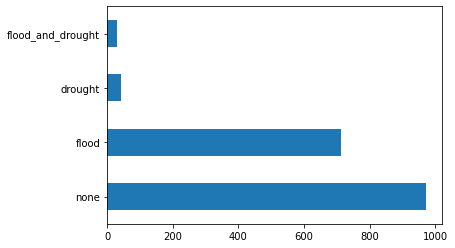

In [71]:
final_twitter_dataset['category'].value_counts().plot(kind='barh')

In [72]:
final_twitter_dataset.to_csv('final_twitter_dataset.csv', index=False)